<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA1_GRUPO_10/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 1
GRUPO 10
 
Elena Gómez

Ana Muñoz

### **OBJETIVO**

Crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. 

En primer lugar tenemos que crear un modelo en Keras aplicando el conjunto de datos Fashion-MNIST.

Fashion-MNISTes un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. 

El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).

Se usan 60K imágenes para entrenar lared y 10K imágenes para evaluarla precisióncon la que la red aprende a clasificar las imágenes

Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 

In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que cada posición se asigna el nombre de cada prenda. ('class_names')

In [2]:
# Importamos las imágenes
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#creamos vector con elementos
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



4431872/4422102 [==============================] - 0s 0us/step


Estudiamos los **datos de entrenamiento**


In [ ]:
print(train_images.shape)


#vemos la matriz de la imagen 50000
train_images[5000]


(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#Sacamos la etiqueta de la imagen 50000
train_labels[5000]

4

Imprimimos la imagen por pantalla utilizando matplotlib, y nos damos cuenta que corresponde con el elemento 4 de nuestro vector, es decir, un abrigo.

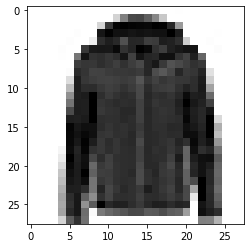

In [3]:
import matplotlib.pyplot as plt
digit = train_images[5000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Estudiamos los **datos de prueba**

In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
test_images[8000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
test_labels[8000]

7

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

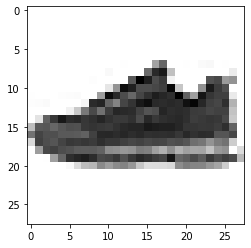

In [4]:
import matplotlib.pyplot as plt
digit = test_images[8000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### **CREAMOS LAS RNA**

Vamos a crear 8 modelos diferentes, para todos la red sera secuencial y tendrá dos capas tipo Dense (densamente conectadas). Cambiaremos el optimizador, la función de activación y el número de neuronas de la primera capa.

Cada una de las neuronas de la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo 
definimos para la primera capa. Para la segunda capa y posteriores, Keras lo 
deduce.

Para todos los modelos, la segunda capa tendrá la función de activación "softmax" de 10 vías (o neuronas). 
Significa que devolverá una matriz de 10 puntuaciones de probabilidad. La puntuación será la probabilidad de que la imagen del dígito actual pertenezca a una de nuestras clases de 10 dígitos.

Para los cuatro primeros modelos, la primera capa tendrá 10 neuronas.

In [5]:
from keras import models
from keras import layers

**MODELO 1**

In [6]:
#función de activación: relu
#optimizador: sgd
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network1.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network1.summary()
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7960 = 7850 + 110


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 2**

In [7]:
#función de activación: relu
#optimizador: rmsprop
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network2.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 3**

In [8]:
##función de activación: sigmoid
#optimizador: sgd
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network3.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**MODELO 4**

In [9]:
#función de activación: sigmoid
#optimizador: rmsprop
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network4.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**COMPILACIÓN**

Para el algoritmo optimizador utilizamos tanto rmsprop (Root Mean Square Propagation), como sgd (Stocastic Gradient Descendent), dependiendo del modelo.

Para la función de pérdida utilizamos sparse_categorical_crossentropy

Para la métrica utilizamos accuracy

In [10]:
network1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
network2.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
network3.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
network4.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### **TRANSFORMACIÓN DATOS**

Antes del entrenamiento, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1].Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28 * 28) con valores entre 0 y 1

In [14]:
# PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
train_images, len(train_images), train_images.shape, #train_images[50000]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 60000, (60000, 784))

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[50000]

In [16]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
# 6.- PREPARACIÓN LAS ETIQUETAS
network1.add(layers.Flatten(input_shape=(28,28)))
network2.add(layers.Flatten(input_shape=(28,28)))
network3.add(layers.Flatten(input_shape=(28,28)))
network4.add(layers.Flatten(input_shape=(28,28)))
train_labels[5000] # Posición 0 a 9 donde solo la 9 tiene probabilidad 1 (boot).

4

Como hemos visto antes la imagen 5000 correspondía con la posición 4 de nuestro vector, de esta manera erificamos que le imagen 5000 se corresponde con dicha posición, ya que aparece el 1 en esa posicion 

### **Entrenamos las redes de neuronas**

In [18]:
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.5827 - accuracy: 0.4829
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8957 - accuracy: 0.7334
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7096 - accuracy: 0.7671
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6407 - accuracy: 0.7857
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6005 - accuracy: 0.7977


In [19]:
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8882 - accuracy: 0.7129
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5210 - accuracy: 0.8219
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8352
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4487 - accuracy: 0.8430
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8485


In [20]:
network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1532 - accuracy: 0.2732
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8724 - accuracy: 0.5669
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6368 - accuracy: 0.6387
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4462 - accuracy: 0.6593
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3022 - accuracy: 0.6704


In [21]:
network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3874 - accuracy: 0.6396
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8147 - accuracy: 0.7837
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6230 - accuracy: 0.8129
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.8281
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4901 - accuracy: 0.8375


VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS

In [22]:
test_loss1, test_acc1 = network1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7866


In [23]:
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8395


In [24]:
test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.2498 - accuracy: 0.6701


In [25]:
test_loss4, test_acc4 = network4.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.8302


Vemos que el modelo 3 (sigmoid, sgd) es el peor ya que tiene la mayor pérdida y es bastante alta (1.2612)

### **PREDICCIONES**

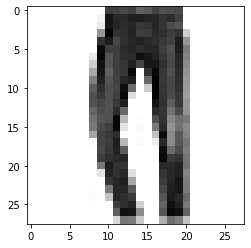

In [29]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print(test_labels)
test_labels = to_categorical(test_labels)
print(test_labels)


[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Hacemos predicciones sobre la 6ª imagen de test en cada modelo

**MODELO 1**

In [31]:
import numpy as np
predictions1 = network1.predict(test_images)
print(np.argmax(predictions1[5]))
print(predictions1[5])
np.sum(predictions1[5])
print(predictions1)

1
[1.4850808e-03 9.6503031e-01 9.5009641e-04 1.4785633e-03 2.7417514e-02
 6.4172468e-07 3.3933320e-03 1.5375944e-07 1.9872814e-04 4.5477158e-05]
[[1.04590172e-05 2.42235197e-04 2.33031187e-05 ... 2.41472229e-01
  8.75251926e-03 6.15981758e-01]
 [2.49278778e-03 1.58132862e-05 9.05831456e-01 ... 4.38044545e-10
  1.84090939e-04 2.34597977e-07]
 [1.98247271e-05 9.97876763e-01 2.69666143e-05 ... 2.30054944e-08
  4.51168216e-06 1.83820939e-05]
 ...
 [1.43082798e-01 6.76718866e-03 4.82832827e-02 ... 3.92155815e-03
  3.81502420e-01 3.51899513e-03]
 [1.11689929e-04 9.63580728e-01 4.88966645e-04 ... 1.15203975e-05
  1.28031286e-04 2.68326700e-03]
 [1.11750246e-03 2.21106247e-03 2.34610261e-03 ... 3.30687106e-01
  1.52950495e-01 9.57123116e-02]]


**MODELO 2**

In [32]:
predictions2 = network2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[1.1899046e-03 9.9678588e-01 8.4049927e-05 6.3023437e-04 1.2410312e-03
 2.1665233e-10 6.8725734e-05 7.7783580e-13 1.3908137e-07 1.2027364e-11]
[[1.1113536e-05 1.7956953e-07 3.2417981e-06 ... 2.1584117e-01
  5.7571270e-03 5.9143597e-01]
 [4.9222159e-05 1.0528120e-06 9.8005038e-01 ... 6.7135068e-11
  8.3185863e-05 2.8582254e-12]
 [1.1252662e-04 9.9982518e-01 8.3866234e-06 ... 2.7541895e-15
  1.0464849e-09 3.0341435e-14]
 ...
 [3.8658556e-02 6.4691485e-06 4.4580549e-03 ... 8.7957678e-06
  7.7300489e-01 9.0430622e-06]
 [1.4238531e-03 9.9633300e-01 2.2355812e-04 ... 4.0267577e-11
  3.4728322e-07 7.3173183e-11]
 [1.8115489e-04 4.8631673e-06 1.8357245e-04 ... 5.3876057e-02
  8.0372244e-03 9.6490337e-03]]


**MODELO 3**

In [33]:
predictions3 = network3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[0.09222367 0.44757915 0.08448217 0.13018534 0.04637558 0.03658309
 0.08840023 0.02414215 0.01320588 0.03682278]
[[0.0145409  0.02003343 0.02913389 ... 0.20056051 0.08420123 0.31544387]
 [0.07323515 0.04008666 0.27559793 ... 0.03461647 0.08576488 0.0227098 ]
 [0.07414151 0.5491559  0.07316361 ... 0.02451645 0.00876622 0.03942567]
 ...
 [0.17641635 0.04361202 0.03581145 ... 0.03332904 0.2053457  0.04954601]
 [0.08113334 0.45771462 0.07189988 ... 0.03260185 0.01265265 0.03954016]
 [0.02418969 0.02182413 0.0427458  ... 0.2809412  0.10722502 0.15373622]]


**MODELO 4**

In [34]:
predictions4 = network4.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions4[5])
np.sum(predictions4[5])
print(predictions4)

1
[4.2238142e-03 9.8158079e-01 1.5270981e-03 7.3380796e-03 3.5045631e-03
 9.1254224e-06 1.5112635e-03 5.0784307e-05 2.4613546e-04 8.3361574e-06]
[[5.5395905e-04 1.3596489e-03 4.4560768e-03 ... 1.6717358e-01
  8.1771454e-03 6.6854292e-01]
 [9.0464270e-03 4.3656244e-03 8.0445284e-01 ... 3.5058128e-04
  2.7652460e-03 4.2659143e-04]
 [2.0516114e-03 9.8853022e-01 7.9979625e-04 ... 5.2327090e-05
  2.7897389e-04 3.5762480e-06]
 ...
 [5.8834027e-02 3.1957196e-03 6.3218977e-03 ... 2.8443330e-03
  7.2024965e-01 2.9689819e-03]
 [1.3564948e-03 9.6363473e-01 1.2796704e-03 ... 2.0709488e-04
  2.6746729e-04 3.0411682e-05]
 [5.7619187e-04 8.7382837e-04 2.8163176e-03 ... 1.6604294e-01
  1.0643521e-02 3.4227531e-02]]


In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [42]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


predictions1 = network1.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)


Predicciones

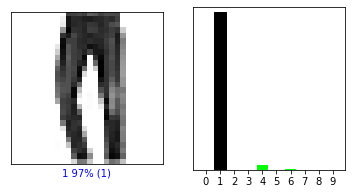

In [43]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

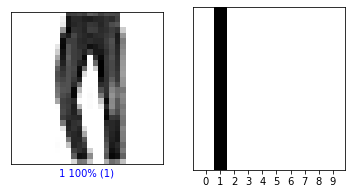

In [44]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  test_labels)
plt.show()


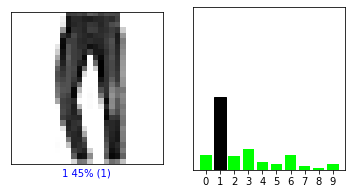

In [45]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions3[i],  test_labels)
plt.show()

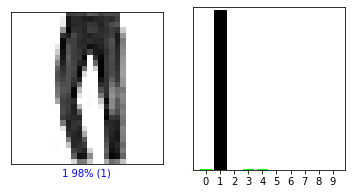

In [46]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions4[i],  test_labels)
plt.show()

### APARTADO 3

Analizar e interpretar los resultados del caso 2 y el 7 frente a susoriginales si se multiplica por 5 las épocas de entrenamiento (25)

In [ ]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name = 'capa1'))
network22.add(layers.Dense(10, activation='softmax', name = 'capa2'))

network22.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                7850      
_________________________________________________________________
capa2 (Dense)                (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network22.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#network22.add(layers.Flatten(input_shape=(28,28)))

In [ ]:
network22.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.8539 - accuracy: 0.7152
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.8226
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.8359
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.8437
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.8484
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.8525
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8555
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4087 - accuracy: 0.8579
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8605
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8618

### APARTADO 6b

Ver la predicción, igual que el gráfico anterior, de las 10 primeras imágenes del conjunto de test, para cada uno de los 8 casos. Reflexioney comente las diferencias que observa.

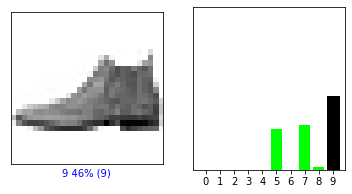

<Figure size 432x288 with 0 Axes>

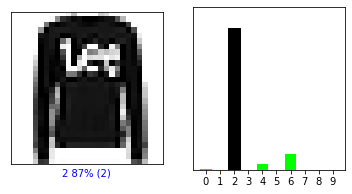

<Figure size 432x288 with 0 Axes>

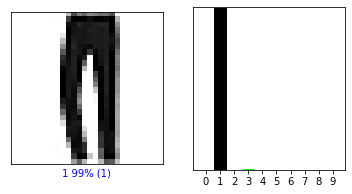

<Figure size 432x288 with 0 Axes>

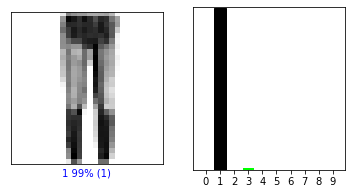

<Figure size 432x288 with 0 Axes>

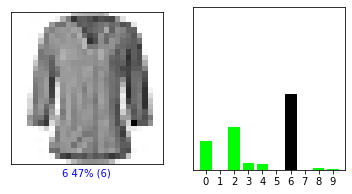

<Figure size 432x288 with 0 Axes>

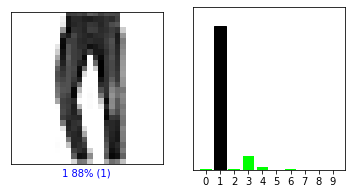

<Figure size 432x288 with 0 Axes>

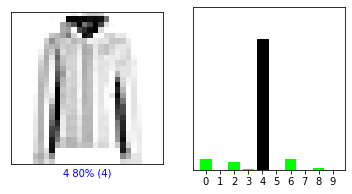

<Figure size 432x288 with 0 Axes>

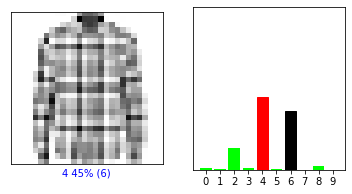

<Figure size 432x288 with 0 Axes>

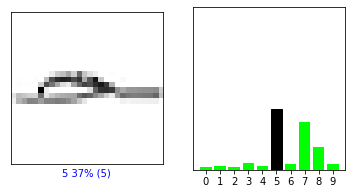

<Figure size 432x288 with 0 Axes>

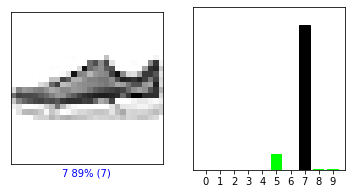

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions1[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions1[i],  test_labels)
    plt.show()
    plt.clf()
    

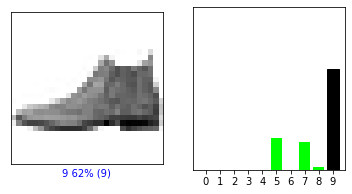

<Figure size 432x288 with 0 Axes>

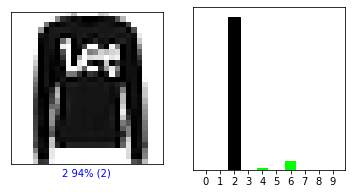

<Figure size 432x288 with 0 Axes>

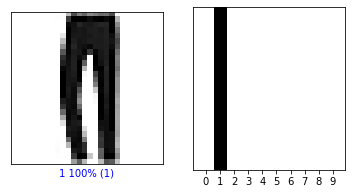

<Figure size 432x288 with 0 Axes>

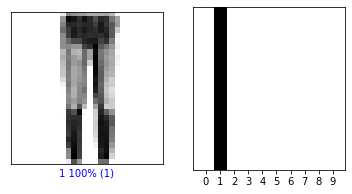

<Figure size 432x288 with 0 Axes>

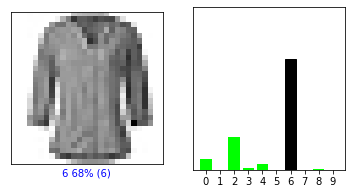

<Figure size 432x288 with 0 Axes>

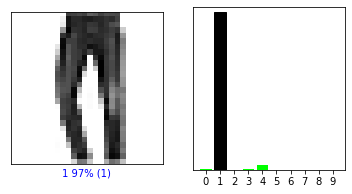

<Figure size 432x288 with 0 Axes>

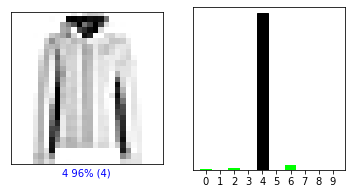

<Figure size 432x288 with 0 Axes>

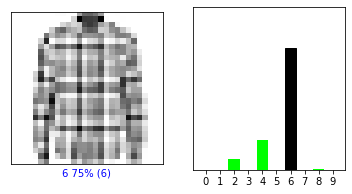

<Figure size 432x288 with 0 Axes>

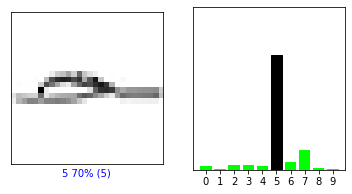

<Figure size 432x288 with 0 Axes>

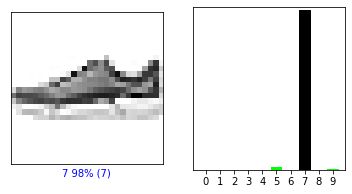

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

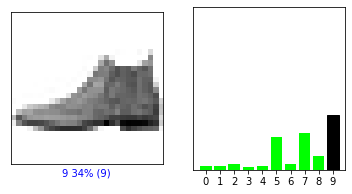

<Figure size 432x288 with 0 Axes>

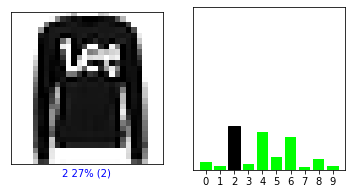

<Figure size 432x288 with 0 Axes>

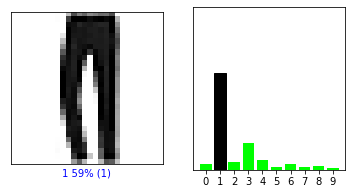

<Figure size 432x288 with 0 Axes>

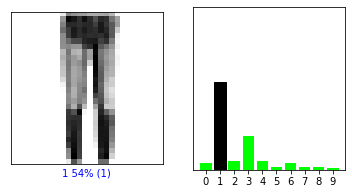

<Figure size 432x288 with 0 Axes>

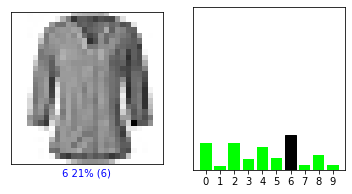

<Figure size 432x288 with 0 Axes>

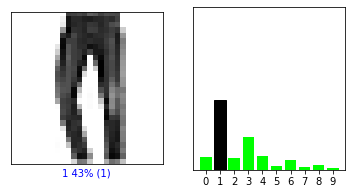

<Figure size 432x288 with 0 Axes>

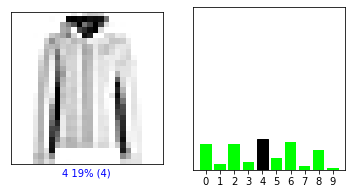

<Figure size 432x288 with 0 Axes>

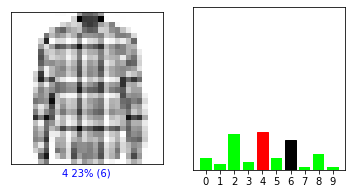

<Figure size 432x288 with 0 Axes>

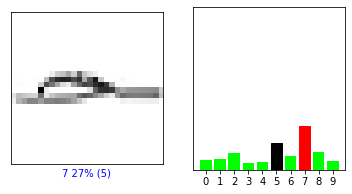

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()

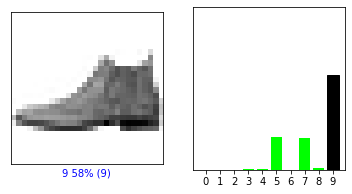

<Figure size 432x288 with 0 Axes>

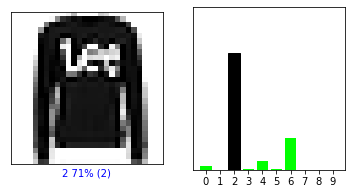

<Figure size 432x288 with 0 Axes>

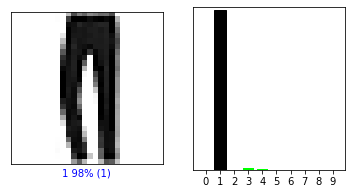

<Figure size 432x288 with 0 Axes>

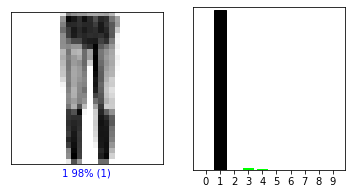

<Figure size 432x288 with 0 Axes>

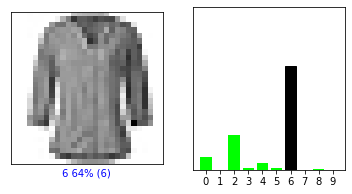

<Figure size 432x288 with 0 Axes>

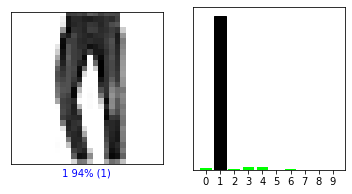

<Figure size 432x288 with 0 Axes>

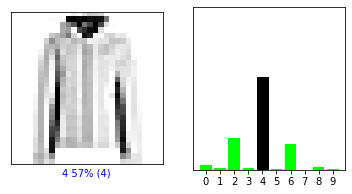

<Figure size 432x288 with 0 Axes>

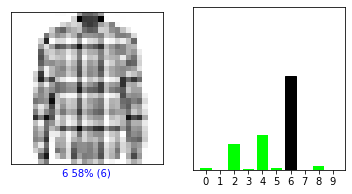

<Figure size 432x288 with 0 Axes>

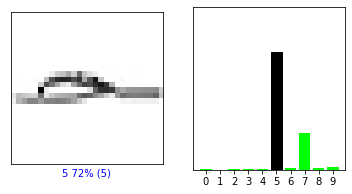

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions4[i],  test_labels)
    plt.show()
    plt.clf()

### APARTADO 7

Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’y la función de pérdida ‘sparse_categorical_crossentropy’.

In [ ]:
##función de activación: sigmoid
##optimizador: sgd
network31 = models.Sequential()
network31.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name = 'capa1'))
network31.add(layers.Dense(10, activation='softmax', name = 'capa2'))

In [ ]:
network31.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network31.add(layers.Flatten(input_shape=(28,28)))

In [ ]:
network31.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3801 - accuracy: 0.6193
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8846 - accuracy: 0.7319
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7135 - accuracy: 0.7714
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6197 - accuracy: 0.7967
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.8258


### **MATRIZ DE CONFUSIÓN**

In [37]:
#import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [51]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels)

[9 2 1 ... 8 1 5]


Matriz M1

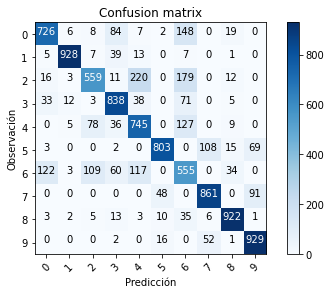

In [52]:
# Predict the values from the validation dataset
Y_pred1 = network1.predict(test_images)
Y_pred_classes1 = np.argmax(Y_pred1, axis = 1) 
Y_true1 = np.argmax(test_labels, axis = 1) 
confusion_mtx1 = confusion_matrix(Y_true1, Y_pred_classes1) 
plot_confusion_matrix(confusion_mtx1, classes = range(10))

Matriz M2

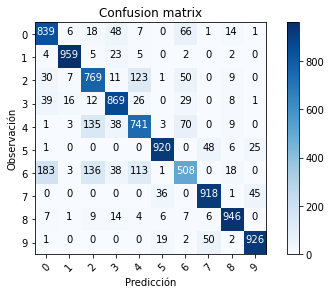

In [40]:
# Predict the values from the validation dataset
Y_pred2 = network2.predict(test_images)
Y_pred_classes2 = np.argmax(Y_pred2, axis = 1) 
Y_true2 = np.argmax(test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
plot_confusion_matrix(confusion_mtx2, classes = range(10))

Matriz M3

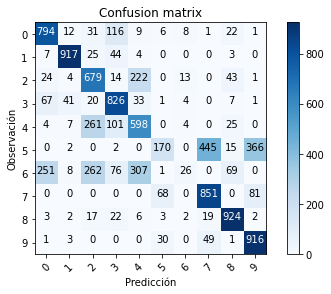

In [41]:
Y_pred3 = network3.predict(test_images)
Y_pred_classes3 = np.argmax(Y_pred3, axis = 1) 
Y_true3 = np.argmax(test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
plot_confusion_matrix(confusion_mtx3, classes = range(10))

Matriz M4

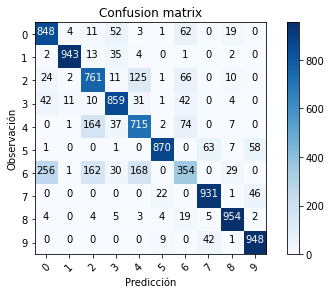

In [ ]:
Y_pred4 = network4.predict(test_images)
Y_pred_classes4 = np.argmax(Y_pred4, axis = 1) 
Y_true4 = np.argmax(test_labels, axis = 1) 
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
plot_confusion_matrix(confusion_mtx4, classes = range(10))